In [1]:
%pip install -q matplotlib numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import http.client
import json
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
def fetch_data(metric_name):
    # Fetch data from the server
    conn = http.client.HTTPConnection("127.0.0.1", 8000)
    conn.request("GET", f"/metric/{metric_name}")
    response = conn.getresponse()
    data = response.read().decode()
    conn.close()

    # Convert data to a Python dictionary
    data_dict = json.loads(data)

    return data_dict

def plot_data(data_dict, timeseries_label, timeseries_title, instant_value_label, instant_value_title):
    # Extract timestamps and values
    timestamps = [datetime.fromtimestamp(item['timestamp']) for item in data_dict]
    values = [item['value'] for item in data_dict]

    # Plot the timeseries graph with smooth lines
    plt.figure(figsize=(10, 5))
    plt.plot(timestamps, values, marker='o', label=timeseries_label)
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title(timeseries_title)
    plt.ylim(0, 100)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # Plot the instant value graph with horizontal bars
    plt.figure(figsize=(10, 1))
    value = data_dict[-1]['value']
    
    # Define color levels for thresholds
    if value < 20:
        color = '#a1d99b'  # light green
    elif value < 40:
        color = '#c7e9c0'  # lighter green
    elif value < 60:
        color = '#fdae6b'  # light orange
    elif value < 80:
        color = '#fd8d3c'  # orange
    else:
        color = '#e6550d'  # dark orange
    
    bar = plt.barh([instant_value_label], value, color=color)
    plt.xlabel('Percentage')
    plt.title(instant_value_title)
    plt.bar_label(bar, fmt='%.2f%%', label_type='edge', padding=3)
    plt.xlim(0, 100)
    plt.grid(False)

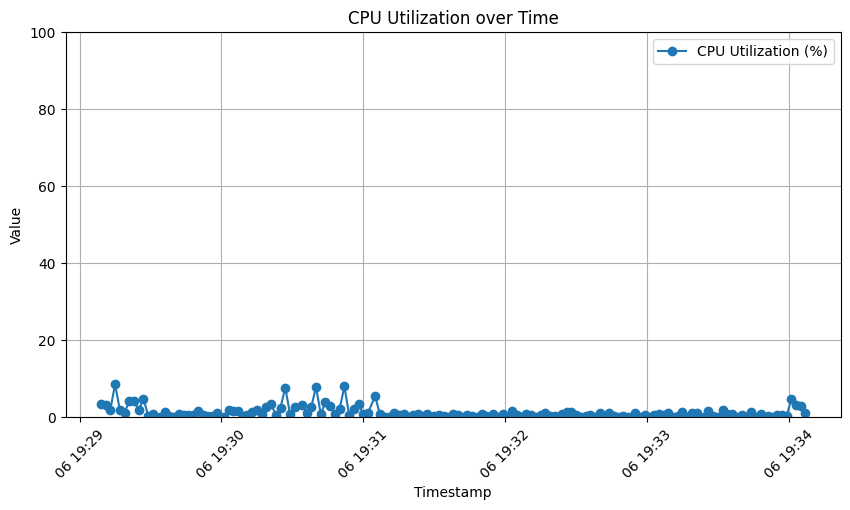

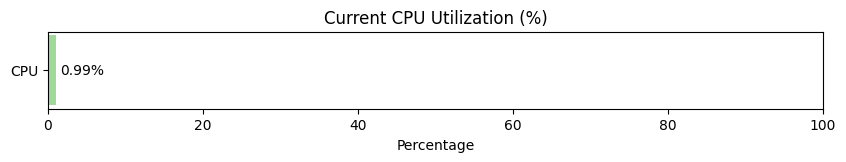

In [4]:
# Fetch data from the server
data_dict = fetch_data('CPUTotalUsagePercentage')

# Plot the data
plot_data(
    data_dict=data_dict,
    timeseries_label='CPU Utilization (%)',
    timeseries_title='CPU Utilization over Time',
    instant_value_label='CPU',
    instant_value_title='Current CPU Utilization (%)'
)

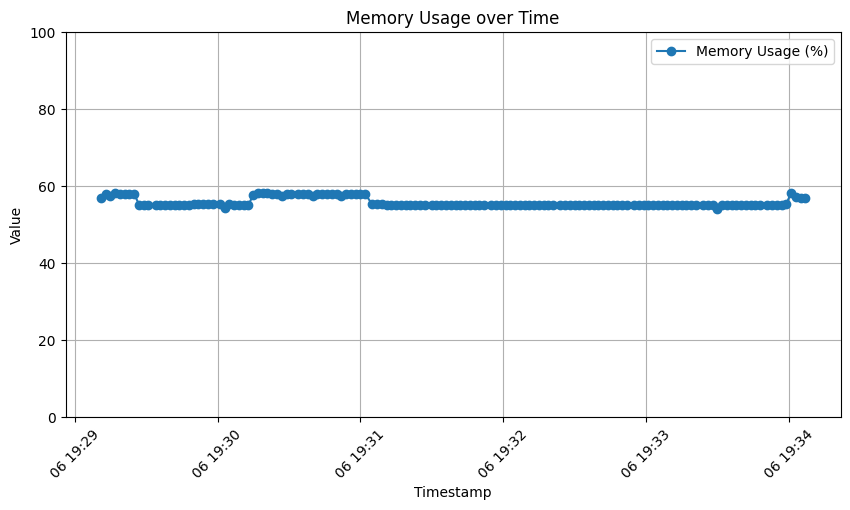

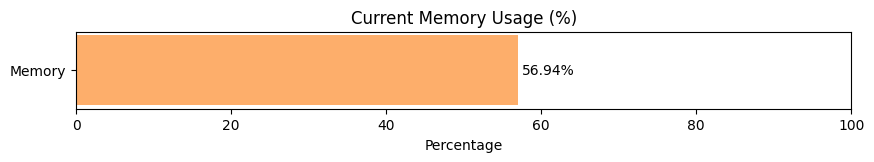

In [5]:
# Fetch data from the server for MemoryTotalUsagePercentage
data_dict_memory = fetch_data('MemoryTotalUsagePercentage')

# Plot the data
plot_data(
    data_dict=data_dict_memory,
    timeseries_label='Memory Usage (%)',
    timeseries_title='Memory Usage over Time',
    instant_value_label='Memory',
    instant_value_title='Current Memory Usage (%)'
)

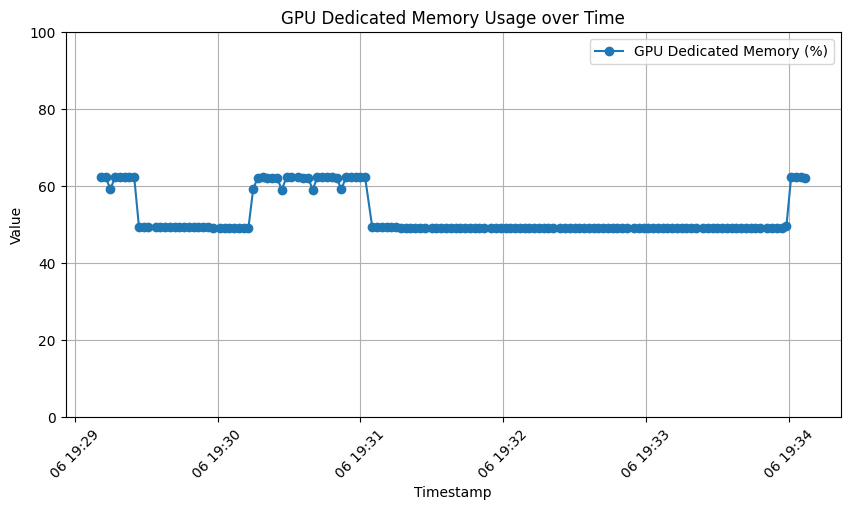

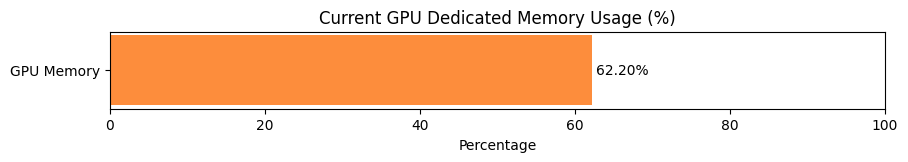

In [6]:
# Fetch data from the server for GPUDedicatedMemoryPercentage
data_dict_gpu = fetch_data('GPUDedicatedMemoryPercentage')

# Plot the data
plot_data(
    data_dict=data_dict_gpu,
    timeseries_label='GPU Dedicated Memory (%)',
    timeseries_title='GPU Dedicated Memory Usage over Time',
    instant_value_label='GPU Memory',
    instant_value_title='Current GPU Dedicated Memory Usage (%)'
)

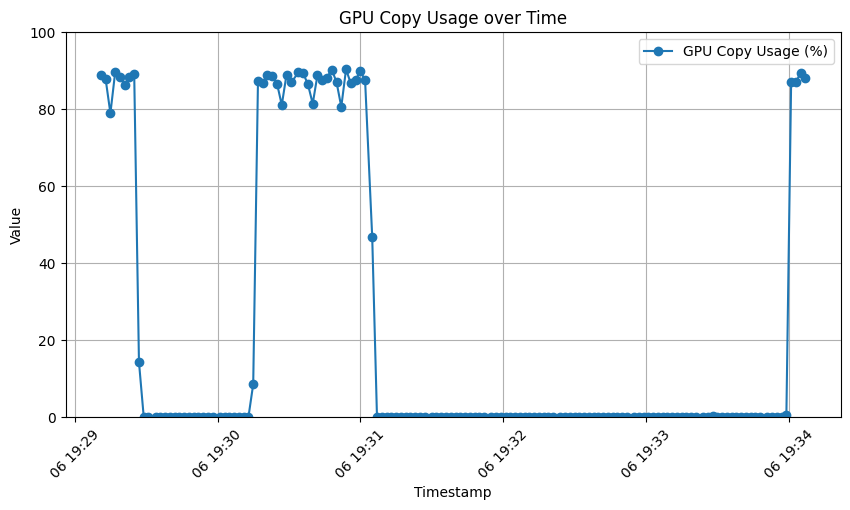

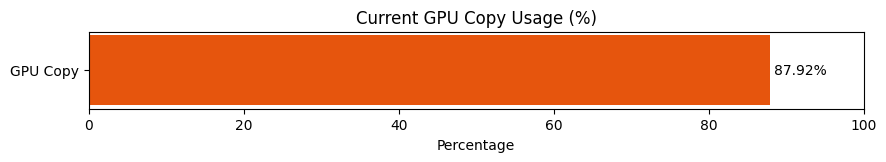

In [7]:
# Fetch data from the server for GPUCopyUsagePercentage
data_dict_gpu_copy = fetch_data('GPUCopyUsagePercentage')

# Plot the data
plot_data(
    data_dict=data_dict_gpu_copy,
    timeseries_label='GPU Copy Usage (%)',
    timeseries_title='GPU Copy Usage over Time',
    instant_value_label='GPU Copy',
    instant_value_title='Current GPU Copy Usage (%)'
)

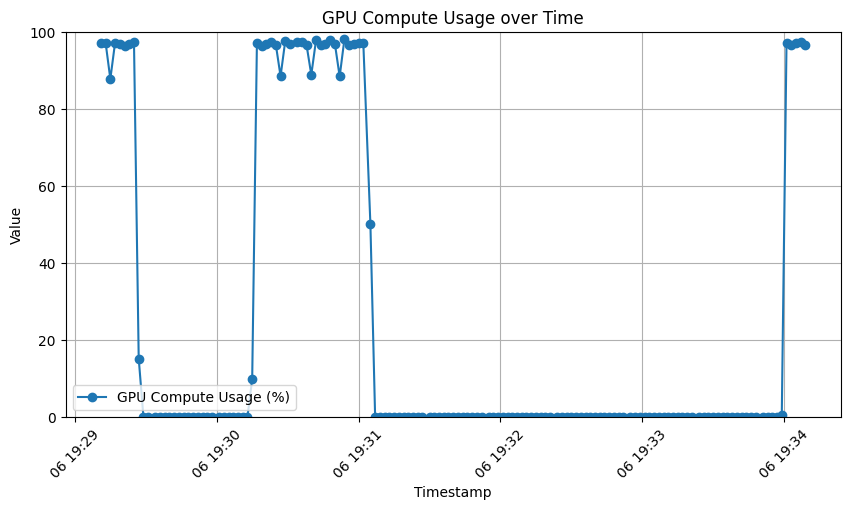

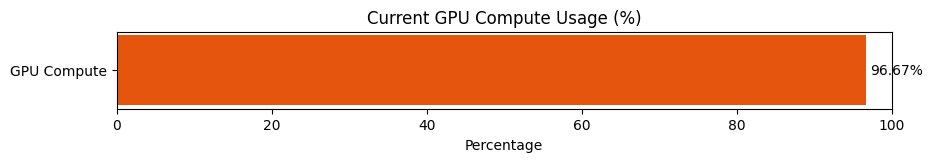

In [8]:
# Fetch data from the server for GPUComputeUsagePercentage
data_dict_gpu_compute = fetch_data('GPUComputeUsagePercentage')

# Plot the data
plot_data(
    data_dict=data_dict_gpu_compute,
    timeseries_label='GPU Compute Usage (%)',
    timeseries_title='GPU Compute Usage over Time',
    instant_value_label='GPU Compute',
    instant_value_title='Current GPU Compute Usage (%)'
)